In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv(r'C:\Users\iauzm\OneDrive\Desktop\DATA SCIENCE\AUZMENDI\PROYECTO-ML\modelos\tabla_pred_1',index_col='Unnamed: 0')
df

,pts_local,FGM_local,FGA_local,FG_PCT_local,FG3M_local,FG3A_local,FG3_PCT_local,FTM_local,FTA_local,FT_PCT_local,...,OUT_visitante,bpi_visitante,off_visitante,def_visitante,pbpi_visitante,OVR_visitante,DEF_visitante,TIER_1_visitante,TIER_2_visitante,TIER__visitante
0,107.000000,41.000000,90.000000,0.456000,10.000000,29.000000,0.345000,15.000000,20.000000,0.750000,...,91,1.481,1.627,-0.147,1.481,83,63,False,True,False
1,116.000000,43.000000,86.000000,0.500000,11.000000,37.000000,0.297000,19.000000,26.000000,0.731000,...,76,-10.147,-6.258,-3.890,-10.147,79,63,False,False,True
2,114.000000,44.000000,94.000000,0.468000,17.000000,43.000000,0.395000,9.000000,10.000000,0.900000,...,92,5.060,2.404,2.657,5.060,83,68,True,False,False
3,119.000000,46.000000,89.000000,0.517000,11.000000,35.000000,0.314000,16.000000,22.000000,0.727000,...,84,-0.617,-0.713,0.096,-0.617,82,68,False,True,False
4,94.000000,34.000000,100.000000,0.340000,8.000000,31.000000,0.258000,18.000000,22.000000,0.818000,...,83,4.609,0.104,4.505,4.609,82,62,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,106.000000,36.333333,84.666667,0.428000,14.333333,41.000000,0.345333,19.000000,24.000000,0.770333,...,87,6.116,3.479,2.637,6.116,83,64,False,True,False
1183,122.666667,50.000000,87.333333,0.576667,12.333333,29.333333,0.430667,10.333333,14.000000,0.758667,...,91,8.075,6.593,1.482,8.075,86,69,True,False,False
1184,111.333333,42.000000,84.333333,0.498000,11.333333,30.000000,0.366000,16.000000,21.000000,0.777000,...,82,4.728,1.192,3.536,4.728,83,70,True,False,False
1185,116.333333,47.666667,91.333333,0.521333,9.666667,28.666667,0.325667,11.333333,13.333333,0.862667,...,91,8.075,6.593,1.482,8.075,86,69,True,False,False


In [16]:
df.columns

Index(['pts_local', 'FGM_local', 'FGA_local', 'FG_PCT_local', 'FG3M_local',
       'FG3A_local', 'FG3_PCT_local', 'FTM_local', 'FTA_local', 'FT_PCT_local',
       'OREB_local', 'DREB_local', 'REB_local', 'AST_local', 'STL_local',
       'BLK_local', 'TOV_local', 'PF_local', 'PLUS_MINUS_local',
       'pts_visitante', 'FGM_visitante', 'FGA_visitante', 'FG_PCT_visitante',
       'FG3M_visitante', 'FG3A_visitante', 'FG3_PCT_visitante',
       'FTM_visitante', 'FTA_visitante', 'FT_PCT_visitante', 'OREB_visitante',
       'DREB_visitante', 'REB_visitante', 'AST_visitante', 'STL_visitante',
       'BLK_visitante', 'TOV_visitante', 'PF_visitante',
       'PLUS_MINUS_visitante', 'ganador_local', 'INS_local', 'OUT_local',
       'bpi_local', 'off_local', 'def_local', 'pbpi_local', 'OVR_local',
       'DEF_local', 'TIER_1_local', 'TIER_2_local', 'TIER__local',
       'INS_visitante', 'OUT_visitante', 'bpi_visitante', 'off_visitante',
       'def_visitante', 'pbpi_visitante', 'OVR_visitante', 'DE

### INTENTO DE MEJORA 1
#### --- Diferencia de columnas---
La idea es restar los valores del equipo local y los del visitante con el objetivo de forzar al modelo a relacionar ambas columnas. Por otro lado reducir las features me va a facilitar la visualización y comprensión de las correlaciones entre features.

Voy a aprovechar para quitar información que imagino no puede tener una correlación alta, y aunque la tuviera, no implicaría causalidad XD.
- tiro libres, ni intentos ni convertidos ni %
- faltas
- recuperaciones de balón
- asistencias
- rebotes ofensivos y defensivo, aunque dejo los generales
- tiros de campo y triples intentados, ya que con el % y los convertidos, es información redundante
  

In [17]:
#COLUMNAS A LAS QUE HAGO RELACIÓN
df['pts']= df['pts_local']- df['pts_visitante']
df['FGM']= df['FGM_local']- df['FGM_visitante']
df['FG_PCT']= df['FG_PCT_local']- df['FG_PCT_visitante']
df['FG3M']= df['FG3M_local']- df['FG3M_visitante']
df['FG3_PCT']= df['FG3_PCT_local']- df['FG3_PCT_visitante']
df['REB']= df['REB_local']- df['REB_visitante']
df['STL']= df['STL_local']- df['STL_visitante']
df['BLK']= df['BLK_local']- df['BLK_visitante']
df['PLUS_MINUS']= df['PLUS_MINUS_local']- df['PLUS_MINUS_visitante']
df['INS']= df['INS_local']- df['INS_visitante']
df['OUT']= df['OUT_local']- df['OUT_visitante']
df['bpi']= df['bpi_local']- df['bpi_visitante']
df['off']= df['off_local']- df['off_visitante']
df['def']= df['def_local']- df['def_visitante']
df['pbpi']= df['pbpi_local']- df['pbpi_visitante']
df['OVR']= df['OVR_local']- df['OVR_visitante']
df['DEF']= df['DEF_local']- df['DEF_visitante']
df.drop(columns=['pts_local', 'FGM_local', 'FGA_local', 'FG_PCT_local', 'FG3M_local',
       'FG3A_local', 'FG3_PCT_local', 'FTM_local', 'FTA_local', 'FT_PCT_local',
       'OREB_local', 'DREB_local', 'REB_local', 'AST_local', 'STL_local',
       'BLK_local', 'TOV_local', 'PF_local', 'PLUS_MINUS_local',
       'pts_visitante', 'FGM_visitante', 'FGA_visitante', 'FG_PCT_visitante',
       'FG3M_visitante', 'FG3A_visitante', 'FG3_PCT_visitante',
       'FTM_visitante', 'FTA_visitante', 'FT_PCT_visitante', 'OREB_visitante',
       'DREB_visitante', 'REB_visitante', 'AST_visitante', 'STL_visitante',
       'BLK_visitante', 'TOV_visitante', 'PF_visitante',
       'PLUS_MINUS_visitante', 'INS_local', 'OUT_local',
       'bpi_local', 'off_local', 'def_local', 'pbpi_local', 'OVR_local',
       'DEF_local',
       'INS_visitante', 'OUT_visitante', 'bpi_visitante', 'off_visitante',
       'def_visitante', 'pbpi_visitante', 'OVR_visitante', 'DEF_visitante'
      ],inplace=True)

       

#### --- Datos ordinales en las columnas TIER---
La idea es reducir de 6 a 2 las columnas con información sobre el tier de los equipos. 

Otra posible opción es asignar un valor de 1 a 3 según el tier de cada equipo, y volver a hacer la diferencia de tier de los equipos. Voy a hacer esto. De 6 a 1 columna

In [18]:
#ESTA FUNCIÓN ASIGNA UN VALOR DE 1 A 3 A LAS COLUMNAS TIER POR ORDEN DE IMPORTANCIA.
#DESPUES SUMA EL VALOR OBTENIDO POR EL LOCAL Y LE RESTA EL OBTENIDO POR LE VISITANTE.
def crear_columna_tier(row):
    local_1 = row['TIER_1_local']*3
    local_2 = row['TIER_2_local']*2
    local_3 = row['TIER__local']
    visitante_1 = row['TIER_1_visitante']*3
    visitante_2 = row['TIER_2_visitante']*2
    visitante_3 = row['TIER__visitante']
    return local_1+local_2+local_3-(visitante_1+visitante_2+visitante_3)

#APLICO LA FUNCION A TODAS LAS COLUMNAS DEL DF
df['TIER']= df.apply(crear_columna_tier,axis=1,raw=False)
#ELIMINO LAS COLUMNAS SOBRANTES
df.drop(columns=['TIER_1_local', 'TIER_2_local', 'TIER__local', 'TIER_1_visitante',
       'TIER_2_visitante', 'TIER__visitante'],inplace=True)
df.head()

,ganador_local,pts,FGM,FG_PCT,FG3M,FG3_PCT,REB,STL,BLK,PLUS_MINUS,INS,OUT,bpi,off,def,pbpi,OVR,DEF,TIER
0,1,-1.0,-1.0,0.014,-1.0,0.012,-16.0,0.0,-3.0,-16.0,8,-5,0.123,0.570,-0.446,0.123,0,3,1
1,0,14.0,2.0,0.054,0.0,-0.047,-5.0,2.0,-10.0,7.0,-8,5,2.395,1.483,0.913,2.395,1,-2,0
2,0,-10.0,-1.0,-0.081,-2.0,-0.092,-5.0,4.0,2.0,-19.0,2,-10,-2.005,-1.804,-0.201,-2.005,-1,-2,0
3,1,33.0,14.0,0.112,-1.0,-0.039,14.0,2.0,2.0,23.0,-1,1,-1.794,-1.973,0.179,-1.794,-2,-5,-1
4,1,-17.0,-4.0,-0.087,-8.0,-0.227,17.0,0.0,3.0,5.0,-1,-1,0.119,1.088,-0.969,0.119,1,8,0


In [19]:
df['target']=df['ganador_local']

In [21]:
df.head()

,pts,FGM,FG_PCT,FG3M,FG3_PCT,REB,STL,BLK,PLUS_MINUS,INS,OUT,bpi,off,def,pbpi,OVR,DEF,TIER,target
0,-1.0,-1.0,0.014,-1.0,0.012,-16.0,0.0,-3.0,-16.0,8,-5,0.123,0.570,-0.446,0.123,0,3,1,1
1,14.0,2.0,0.054,0.0,-0.047,-5.0,2.0,-10.0,7.0,-8,5,2.395,1.483,0.913,2.395,1,-2,0,0
2,-10.0,-1.0,-0.081,-2.0,-0.092,-5.0,4.0,2.0,-19.0,2,-10,-2.005,-1.804,-0.201,-2.005,-1,-2,0,0
3,33.0,14.0,0.112,-1.0,-0.039,14.0,2.0,2.0,23.0,-1,1,-1.794,-1.973,0.179,-1.794,-2,-5,-1,1
4,-17.0,-4.0,-0.087,-8.0,-0.227,17.0,0.0,3.0,5.0,-1,-1,0.119,1.088,-0.969,0.119,1,8,0,1


<Axes: >

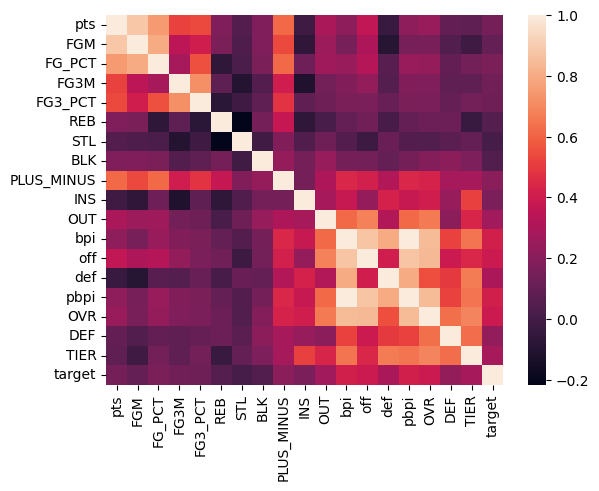

In [24]:
import seaborn as sns
sns.heatmap(df.corr())

In [25]:
df.to_csv(r'C:\Users\iauzm\OneDrive\Desktop\DATA SCIENCE\AUZMENDI\PROYECTO-ML\modelos\tabla_pred_2')